# NIDS PROGRAME

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


# reading features list
with open("C:\\Users\\biswajit\\OneDrive\\Desktop\\project\\data sets\\kddcup.names", 'r') as features_list:
    print("Reading Features list : ",features_list.read())
    

#  Appending columns to the dataset and adding a new column name ‘target’ to the dataset.
cols ="duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"

columns =[]
c=cols.split(',')
#print(c)
for i in range(len(c)):
    columns.append(c[i].strip())

columns.append('target')
print("Total numbers of column : ",len(columns))
print("")

#  Reading the ‘attack_types’ file.
with open("C:\\Users\\biswajit\\OneDrive\\Desktop\\project\\data sets\\training_attack_types", 'r') as attack_types:
    print("Attack Types are : ",attack_types.read())
    


Reading Features list :  back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous

##  Creating a dictionary of attack_types

In [2]:

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


df = pd.read_csv("C:\\Users\\biswajit\\OneDrive\\Desktop\\project\\data sets\\kddcup.data_10_percent.gz", names = columns)

# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [3]:
df.shape

(494021, 43)

In [4]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Finding categorical features

In [5]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'service', 'protocol_type']

##  Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis

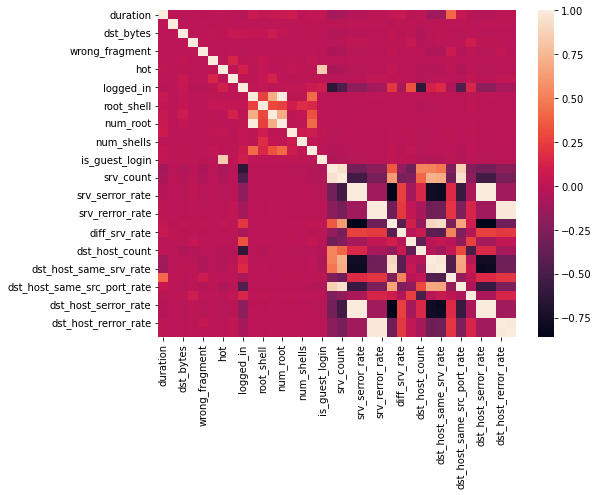

In [6]:
df = df.dropna(axis=1)# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 
                                                     # 1 unique values

corr = df.corr()
#print(corr)
plt.figure(figsize =(8, 6))

sns.heatmap(corr)

plt.show()

In [9]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738129

In [10]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725588

In [11]:
df['srv_count'].corr(df['count'])

0.9436670688882609

In [12]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818195

In [13]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953938

In [14]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373276

In [15]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110384

In [16]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691318

In [17]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323971

In [18]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783212

In [19]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105014

In [20]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373957

In [21]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679914

In [22]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091849968

In [23]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495607

In [24]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308442

In [25]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751446

In [26]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845719

In [27]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

##  Protocol_type feature mapping

In [28]:
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

# flag feature mapping

fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8,
        'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

df=df.drop(['service'], axis = 1)
df=df.drop(['target'], axis = 1)
y = df[['Attack Type']]
x = df.drop(['Attack Type', ], axis = 1)
print(df)

        duration  protocol_type  flag  src_bytes  dst_bytes  land  \
0              0              1     0        181       5450     0   
1              0              1     0        239        486     0   
2              0              1     0        235       1337     0   
3              0              1     0        219       1337     0   
4              0              1     0        217       2032     0   
...          ...            ...   ...        ...        ...   ...   
494016         0              1     0        310       1881     0   
494017         0              1     0        282       2286     0   
494018         0              1     0        203       1200     0   
494019         0              1     0        291       1200     0   
494020         0              1     0        219       1234     0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  rerror_rate  \
0                    0       0    0                  0  ...          0.0   
1                  

## Importing libraries and splitting the dataset.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


s = MinMaxScaler()
x = s.fit_transform(x)

# Split test and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

print(df.shape)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [30]:
train_score_list=[]
test_score_list=[]
training_time=[]
testing_time=[]

# Using different types of models .

## 1. Gaussian Naive Bayes .

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Naive_Bayes = GaussianNB()

start_time = time.time()
y=y_train.values.ravel()
Naive_Bayes=Naive_Bayes.fit(x_train, y)
end_time = time.time()
training_time.append(end_time-start_time)
print("Training time Gaussian Naive Bayes model is : ", end_time-start_time)

start_time = time.time()
y_test_pred = Naive_Bayes.predict(x_train)
end_time = time.time()
testing_time.append(end_time-start_time)
print("Testing time Gaussian Naive Bayes model is : ", end_time-start_time)
print(" ")

train_score=Naive_Bayes.score(x_train, y_train)
train_score_list.append(train_score)
test_score=Naive_Bayes.score(x_test, y_test)
test_score_list.append(test_score)

print("Train score of Gaussian Naive Bayes model is : ",train_score)
print("Test score of Gaussian Naive Bayes model is : ",test_score)

Training time Gaussian Naive Bayes model is :  1.2747786045074463
Testing time Gaussian Naive Bayes model is :  1.2309329509735107
 
Train score of Gaussian Naive Bayes model is :  0.8795114110829804
Test score of Gaussian Naive Bayes model is :  0.8790384414851528


## 2. Decision Tree .

In [32]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
Decision_Tree.fit(x_train, y_train.values.ravel())
end_time = time.time()
training_time.append(end_time-start_time)
print("Training time Decision Tree model is : ", end_time-start_time)

start_time = time.time()
y_test_pred = Decision_Tree.predict(x_train)
end_time = time.time()
testing_time.append(end_time-start_time)
print("Testing time Decision Tree model is : ", end_time-start_time)
print(" ")

train_score=Decision_Tree.score(x_train, y_train)
train_score_list.append(train_score)
test_score=Decision_Tree.score(x_test, y_test)
test_score_list.append(test_score)

print("Train score of Decision Tree model is : ",train_score)
print("Test score of Decision Tree model is : ",test_score)

Training time Decision Tree model is :  2.121811866760254
Testing time Decision Tree model is :  0.10397839546203613
 
Train score of Decision Tree model is :  0.9905829108684749
Test score of Decision Tree model is :  0.9905230421954646


## 3. Random Forest .

In [33]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators = 30)

start_time = time.time()
Random_Forest.fit(x_train, y_train.values.ravel())
end_time = time.time()
training_time.append(end_time-start_time)
print("Training time Random Forest model is : ", end_time-start_time)

start_time = time.time()
y_test_pred = Random_Forest.predict(x_train)
end_time = time.time()
testing_time.append(end_time-start_time)
print("Testing time Random Forest model is : ", end_time-start_time)
print(" ")

train_score=Random_Forest.score(x_train, y_train)
train_score_list.append(train_score)
test_score=Random_Forest.score(x_test, y_test)
test_score_list.append(test_score)

print("Train score of Random Forest model is : ",train_score)
print("Test score of Random Forest model is : ",test_score)

Training time Random Forest model is :  15.258458852767944
Testing time Random Forest model is :  2.49009108543396
 
Train score of Random Forest model is :  0.99997583037759
Test score of Random Forest model is :  0.9996687665233366


## 4. SVM .

In [34]:
from sklearn.svm import SVC

SVM = SVC(gamma = 'scale')

start_time = time.time()
SVM.fit(x_train, y_train.values.ravel())
end_time = time.time()
training_time.append(end_time-start_time)
print("Training time SVM model is : ", end_time-start_time)

start_time = time.time()
y_test_pred = SVM.predict(x_train)
end_time = time.time()
testing_time.append(end_time-start_time)
print("Testing time SVM model is : ", end_time-start_time)
print(" ")

train_score=SVM.score(x_train, y_train)
train_score_list.append(train_score)
test_score=SVM.score(x_test, y_test)
test_score_list.append(test_score)

print("Train score of SVM model is : ",train_score)
print("Test score of SVM model is : ",test_score)

Training time SVM model is :  294.63923025131226
Testing time SVM model is :  440.5936372280121
 
Train score of SVM model is :  0.9987552644458811
Test score of SVM model is :  0.9987916112055059


## 5. Logistic Regression .

In [35]:
from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression(max_iter = 1200000)

start_time = time.time()
Logistic_Regression.fit(x_train, y_train.values.ravel())
end_time = time.time()
training_time.append(end_time-start_time)
print("Training time Logistic Regression model is : ", end_time-start_time)

start_time = time.time()
y_test_pred = Logistic_Regression.predict(x_train)
end_time = time.time()
testing_time.append(end_time-start_time)
print("Testing time Logistic Regression model is : ", end_time-start_time)
print(" ")

train_score=Logistic_Regression.score(x_train, y_train)
train_score_list.append(train_score)
test_score=Logistic_Regression.score(x_test, y_test)
test_score_list.append(test_score)

print("Train score of Logistic Regression model is : ",train_score)
print("Test score of Logistic Regression model is : ",test_score)

Training time Logistic Regression model is :  97.29947090148926
Testing time Logistic Regression model is :  0.0781090259552002
 
Train score of Logistic Regression model is :  0.9935285835997028
Test score of Logistic Regression model is :  0.9935286792985211


## 6. Gradient Descent .

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient_Descent = GradientBoostingClassifier(random_state = 0)

start_time = time.time()
Gradient_Descent.fit(x_train, y_train.values.ravel())
end_time = time.time()
training_time.append(end_time-start_time)
print("Training time Gradient Descent model is : ", end_time-start_time)

start_time = time.time()
y_test_pred = Gradient_Descent.predict(x_train)
end_time = time.time()
testing_time.append(end_time-start_time)
print("Testing time Gradient Descent model is : ", end_time-start_time)
print(" ")

train_score=Gradient_Descent.score(x_train, y_train)
train_score_list.append(train_score)
test_score=Gradient_Descent.score(x_test, y_test)
test_score_list.append(test_score)

print("Train score of Gradient Descent model is : ",train_score)
print("Test score of Gradient Descent model is : ",test_score)

Training time Gradient Descent model is :  682.2636125087738
Testing time Gradient Descent model is :  4.001086235046387
 
Train score of Gradient Descent model is :  0.9979304760811374
Test score of Gradient Descent model is :  0.9977181693829856


In [40]:
print(train_score_list)
print(test_score_list)
print(training_time)
print(testing_time)

[0.8795114110829804, 0.9905829108684749, 0.99997583037759, 0.9987552644458811, 0.9935285835997028, 0.9979304760811374]
[0.8790384414851528, 0.9905230421954646, 0.9996687665233366, 0.9987916112055059, 0.9935286792985211, 0.9977181693829856]
[1.2747786045074463, 2.121811866760254, 15.258458852767944, 294.63923025131226, 97.29947090148926, 682.2636125087738]
[1.2309329509735107, 0.10397839546203613, 2.49009108543396, 440.5936372280121, 0.0781090259552002, 4.001086235046387]


# Analyse the training accuracy of each model.

In [41]:
def percent_list(x):
    b=[]
    for i in range(len(x)):
        a=x[i]*100
        a=round(a,3)
        b.append(a)
    return (b)

training_percent=percent_list(train_score_list)
testing_percent=percent_list(test_score_list)

print(training_percent)
print(testing_percent)

[87.951, 99.058, 99.998, 99.876, 99.353, 99.793]
[87.904, 99.052, 99.967, 99.879, 99.353, 99.772]


<BarContainer object of 6 artists>

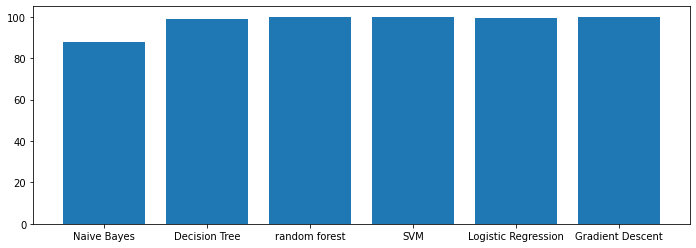

In [55]:
import numpy as np
models = ['Naive Bayes', 'Decision Tree', 'random forest', 'SVM', 'Logistic Regression', 'Gradient Descent']

# training percent graph .

f = plt.figure(figsize =(40, 4), num = 10)
plt.subplot(131)
plt.bar(models, training_percent)

<BarContainer object of 6 artists>

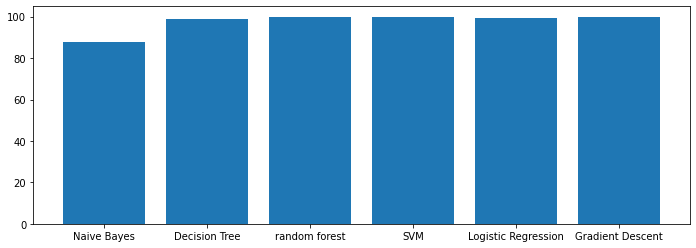

In [56]:
# testing percent graph .

f = plt.figure(figsize =(40, 4), num = 10)
plt.subplot(131)
plt.bar(models, testing_percent)

#### Time Graph .

In [57]:
for i in range(len(training_time)):
    training_time[i]=round(training_time[i],5)
    testing_time[i]=round(testing_time[i],5)

<BarContainer object of 6 artists>

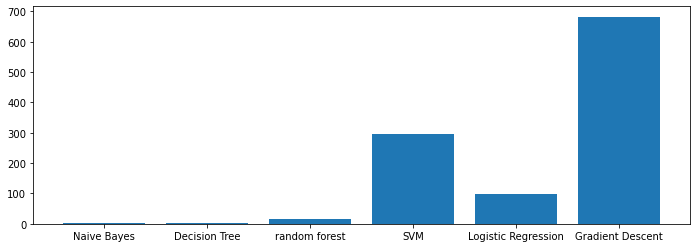

In [58]:
# training time graph.
f = plt.figure(figsize =(40, 4), num = 10)
plt.subplot(131)
plt.bar(models,training_time)

<BarContainer object of 6 artists>

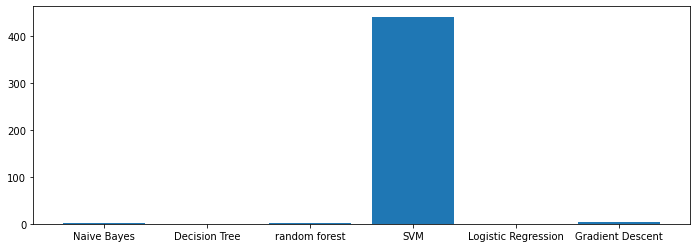

In [59]:
# testing time graph.
f = plt.figure(figsize =(40, 4), num = 10)
plt.subplot(131)
plt.bar(models,testing_time)